In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# 과제2: MNIST 데이터를 나만의 NN model로 98 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [3]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [4]:
x_train, x_test = x_train.reshape((-1, 28,28,1)), x_test.reshape((-1, 28,28,1))
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

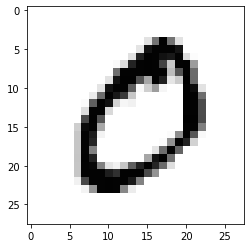

In [5]:
plt.imshow(x_train[1].reshape((28 , 28))).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [6]:
y_train.shape

(60000,)

In [7]:
# show MNIST label for above data
y_train[1]

0

* parameters for model

In [8]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [9]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout
model = tf.keras.Sequential()
model.add(Conv2D(input_shape = (28,28,1), kernel_size= (5,5), filters=20, activation='relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Conv2D(input_shape = (28,28,1), kernel_size= (5,5), filters=20, activation='relu'))
model.add( MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 50, activation = 'relu'))
model.add(Flatten())
model.add(Dense(units = 10, activation = 'sigmoid'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

내가 만든 모델을 확인해 봅시다.

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          10020     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                16050     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)               

model을 자유롭게 train 해봅시다.  

In [11]:
model.fit(x=x_train, y = y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2062 - sparse_categorical_accuracy: 0.9366
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0655 - sparse_categorical_accuracy: 0.9793 0s - loss: 0.0660 - sparse_categorical_acc
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0474 - sparse_categorical_accuracy: 0.9851 2s - loss: 0.047
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0365 - sparse_categorical_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0298 - sparse_categorical_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0250 - sparse_categorical_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0220 - sparse_categorical_accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0

95%이상의 성능을 가진 모델을 만들면 완성!

In [12]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy: %.4f'%test_acc)

313/313 - 1s - loss: 0.0422 - sparse_categorical_accuracy: 0.9887

Accuracy: 0.9887


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)